In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
sns.set()

In [2]:
G = nx.Graph()

G.add_node(1, pos = (1, 1), goal = 'start')
# G.add_node(1, 2, pos = (1, 2))
# G.add_node(0, 2, pos = (2, 4))
G.add_node(5, pos = (3, 4), goal = 'end')

# G.add_edge(0, 1, weight = 20, relation='friend')
# G.add_edge(1, 2, weight = 30, relation='enemy')
# G.add_edge(0, 2, weight = 10, relation='enemy')
# G.add_edge(0, 4, weight = 100, relation='friend')

weight = nx.get_edge_attributes(G, 'weight')
pos = nx.get_node_attributes(G, 'pos')
# relation = nx.get_edge_attributes(G, 'relation')
goal = nx.get_node_attributes(G, 'goal')

{}

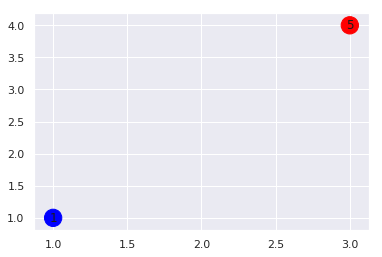

In [3]:
plt.figure()
dic = {'start' : 'blue', 'end' : 'red'}
# dic = {'friend' : 'blue', 'enemy' : 'red'}

nx.draw_networkx(G, pos, node_color=[dic[x] for x in goal.values()])
nx.draw_networkx_edge_labels(G, pos, edge_labels=weight)

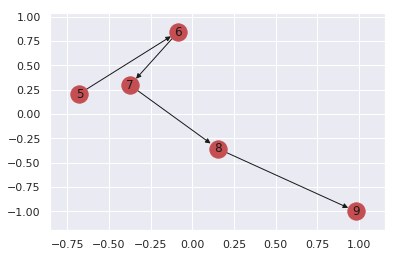

In [5]:
G2 = nx.DiGraph()

# G2.add_nodes_from([0, 1, 2, 3])
# G2.add_nodes_from(range(100, 110))

# e = zip(range(0, 9), range(1, 10))
a = zip(range(5, 9), range(6, 10))
# G2.add_edges_from(e)
G2.add_edges_from(a)
plt.figure()

nx.draw_networkx(G2)

In [8]:
my_string = 'Room: coordinate_x, coordinate_y'

# split the string at ':'
step_0 = my_string.split(':')

# get the first slice of the list
step_1 = step_0[1]

# split the string at ','
step_2 = step_1.split(',')

# strip leading and trailing edge spaces of each item of the list 
step_3 = [name.strip() for name in step_2]

# do all the above operations in one go
one_go = [name.strip() for name in my_string.split(':')[1].split(',')]

for idx, item in enumerate([step_0, step_1, step_2, step_3]):
    print("Step {}: {}".format(idx, item))

print("Final result in one go: {}".format(one_go))

Step 0: ['Room', ' coordinate_x, coordinate_y']
Step 1:  coordinate_x, coordinate_y
Step 2: [' coordinate_x', ' coordinate_y']
Step 3: ['coordinate_x', 'coordinate_y']
Final result in one go: ['coordinate_x', 'coordinate_y']


In [14]:
# Using ReGex to find specifics keywords

import re

# file = open('ex.txt', 'r')

# strings = re.search(r"\w*([-])\w*", file.read(), flags=re.MULTILINE)
# print(strings)
# file.close()

cnt = 0
with open('ex.txt', 'r') as fp:
    for line in fp:
        cnt += 1
        if re.match('([^\s#]{1,10}) (\d+) (\d+)', line, re.MULTILINE):
            print ("Room name: {}".format(line))
        if re.match('^\w*([-])\w*', line, re.MULTILINE): #checks for linking rooms
            print ("link at line [{}]: {}".format(cnt, line))
        if line.startswith('##start'): #checks for start
            print ("start at : {}\n".format(next(fp, '').strip()))
        if line.startswith('##end'): #checks for end
            print ("end at : {}\n".format(next(fp, '').strip()))

Room name: a2a 5 0

start at : a0 1 2

end at : a1 9 2

Room name: 3 5 4

link at line [6]: 0-2

link at line [7]: 0-3

link at line [8]: 2-1

link at line [9]: 3-1

link at line [10]: 2-3



In [24]:
# Using ReGex to find specifics keywords

import re

# file = open('ex.txt', 'r')

# strings = re.search(r"\w*([-])\w*", file.read(), flags=re.MULTILINE)
# print(strings)
# file.close()

def test():
    cnt = 0
    links = []
    rooms = []
    coords = []
    start = []
    start_coords = []
    end = []
    end_coords = []
    output_list = []
    output_links = []

    with open('ex.txt', 'r') as fp:
        for line in fp:
            cnt += 1
            #checks for the room name and coordinates
            if re.match('([^\s#]{1,10}) (\d+) (\d+)', line, re.MULTILINE):
                rooms.append(line.strip().split(' '))
                output_list.append(line)
                test = line.split()[0]
                coords = int(line.split()[1]), int(line.split()[2])
                print("\nRoom: ", test)
                print("Coordinates x and y", coords)
                print ("Room and coordinates: {}".format(line))
            #checks for linking rooms
            if re.search('^\w*([-])\w*', line, re.MULTILINE):
                links.append(line)
                output_links.append(line.strip())
                print ("link at line [{}]: {}".format(cnt, line))
            #checks for start
            if line.startswith('##start'):
    #             start.append(next(fp, '').strip())
                output_list.append(next(fp, '').strip())
    #             step_0 = start[0].split(' ')
    #             start_coords = step_0[1], step_0[2]
    #             print ("\nRoom start at : {}".format((start[0].split()[0])))
    #             print("Coordinates x and y: ", tuple((int(start_coords[0]), int(start_coords[1]))))
    #             print ("Room and coordinates: {0} {1} {2}".format((step_0[0]), int(step_0[1]), int(step_0[2])))
            #checks for end
            if line.startswith('##end'):
    #             end.append(next(fp, '').strip())
                output_list.append(next(fp, '').strip())
    #             step_0 = end[0].split(' ')
    #             end_coords = step_0[1], step_0[2]
    #             print ("\nRoom end at : {}".format((end[0].split()[0])))
    #             print("Coordinates x and y: ", tuple((int(end_coords[0]), int(end_coords[1]))))
    #             print ("Room and coordinates: {0} {1} {2}".format((step_0[0]), int(step_0[1]), int(step_0[2])))
    print("Links -> ", links)
    print("Start (x, y) -> ", start)
    print("Rooms (x, y) -> ", rooms)
    print("End (x, y) ->", end)
    # start[0].split(' ')
    # step_0[1]
    # step_1
    # start_coords

    # str1 = ''.join(links)
    # str1.strip().split('\n')
    # list(enumerate(rooms))

    # print(output_list)
    # print(output_links)
    return (output_list, output_links)

rooms, links = test()
print(rooms)
print(links)


Room:  2
Coordinates x and y (5, 0)
Room and coordinates: 2 5 0


Room:  3
Coordinates x and y (5, 4)
Room and coordinates: 3 5 4

link at line [6]: 0-2

link at line [7]: 0-3

link at line [8]: 2-1

link at line [9]: 3-1

link at line [10]: 2-3

Links ->  ['0-2\n', '0-3\n', '2-1\n', '3-1\n', '2-3\n']
Start (x, y) ->  []
Rooms (x, y) ->  [['2', '5', '0'], ['3', '5', '4']]
End (x, y) -> []
['2 5 0\n', '0 1 2', '1 9 2', '3 5 4\n']
['0-2', '0-3', '2-1', '3-1', '2-3']


In [23]:
#Putting everything together now...

import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

def test_links(line):
    links = []
    
    if re.search('^\w*([-])\w*', line, re.MULTILINE):
        links.append(line)
        print ("link at line [{}]: {}".format(line))
    return (links)

def file_parsing(file_name):
    '''
    Reading the file raw to parse the information needed.
    Rooms
    Links
    Coordinates (x, y)
    '''
    cnt = 0
    links = []
    rooms = []
    coords = []
    start = []
    start_coords = []
    end = []
    end_coords = []
    
    with open('ex.txt', 'r') as fp:
        for line in fp:
            cnt += 1
            #checks for the room name and coordinates
            if re.match('([^\s#]{1,10}) (\d+) (\d+)', line, re.MULTILINE):
                rooms.append(line.strip().split(' '))
                test = line.split()[0]
                coords = int(line.split()[1]), int(line.split()[2])
                print("\nRoom: ", test)
                print("Coordinates x and y", coords)
                print ("Room and coordinates: {}".format(line))
            #checks for linking rooms
            if re.search('^\w*([-])\w*', line, re.MULTILINE):
                links.append(line)
                print ("link at line [{}]: {}".format(cnt, line))
            #checks for start
            if line.startswith('##start'):
                start.append(next(fp, '').strip())
                step_0 = start[0].split(' ')
                start_coords = step_0[1], step_0[2]
                print ("Room start at : {}".format((start[0].split()[0])))
                print("Coordinates x and y: ", tuple((int(start_coords[0]), int(start_coords[1]))))
                print ("Room and coordinates: {0} {1} {2}".format((step_0[0]), int(step_0[1]), int(step_0[2])))
            #checks for end
            if line.startswith('##end'):
                end.append(next(fp, '').strip())
                step_0 = end[0].split(' ')
                end_coords = step_0[1], step_0[2]
                print ("\nRoom end at : {}".format((end[0].split()[0])))
                print("Coordinates x and y: ", tuple((int(end_coords[0]), int(end_coords[1]))))
                print ("Room and coordinates: {0} {1} {2}".format((step_0[0]), int(step_0[1]), int(step_0[2])))
    print("Links -> ", links)
    print("Start (x, y) -> ", start)
    print("Rooms (x, y) -> ", rooms)
    print("End (x, y) ->", end)


Room information:  ['a2a', 'a0', 'a1', '3']
Room information:  [['a2a', '5', '0'], ['a0', '1', '2'], ['a1', '9', '2'], ['3', '5', '4']]
X and Y position as tuple list:  [(5, 0), (1, 2), (9, 2), (5, 4)]
Links:  [('a0', 'a2a'), ('a0', '3'), ('a2a', '1'), ('3', '1'), ('a2a', '3')]


<IPython.core.display.Javascript object>


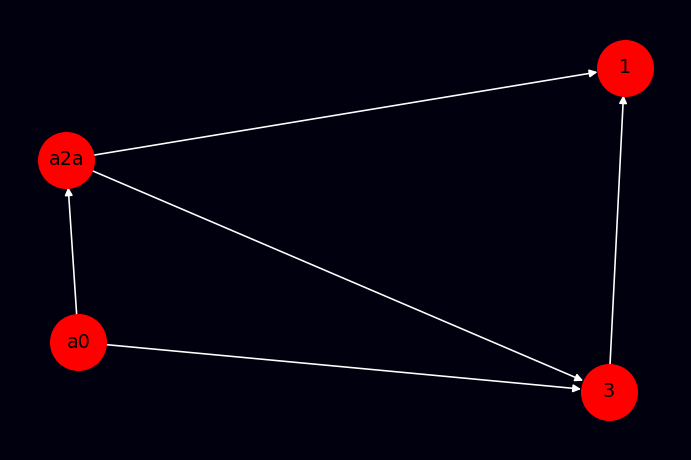

In [3]:
#Clean version for now

import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

def file_parsing(file_path):
    cnt = 0
    output_list = []
    output_links = []

    with open(file_path, 'r') as fp:
        for line in fp:
            cnt += 1
            #checks for the room name and coordinates
            if re.match('([^\s#]{1,10}) (\d+) (\d+)', line, re.MULTILINE):
                output_list.append(line.strip().split(' '))
            #checks for linking rooms
            if re.search('^\w*([-])\w*', line, re.MULTILINE):
                output_links.append(line.strip().split('-'))
            #checks for start
            if line.startswith('##start'):
                output_list.append(next(fp, '').strip().split())
            #checks for start
            if line.startswith('##end'):
                output_list.append(next(fp, '').strip().split())
    room_name = [item[0] for item in output_list]
    x_coord = [int(item[1]) for item in output_list]
    y_coord = [int(item[2]) for item in output_list]
    x_y = list(zip(x_coord, y_coord))
    links_x = [item[0] for item in output_links]
    links_y = [item[1] for item in output_links]
    links = list(zip(links_x, links_y))
    pos_dict = dict(zip(room_name, x_y))
    return (room_name, links, output_list, x_y, pos_dict)

# def graph_all():
rooms, links, room_coords, xpos_ypos, room_pos_dict = file_parsing('ex.txt')
# print(start[0].split(' '))
print("Room information: ", rooms)
print("Room information: ", room_coords)
print("X and Y position as tuple list: ", xpos_ypos)
print("Links: ", links)
DG = nx.DiGraph()
DG.add_edges_from(links)
# testing = ['a2a', '1', '2', 'ahs6']
# DG.add_nodes_from(rooms, pos = xpos_ypos)
# pos = nx.get_node_attributes(DG, 'pos')
# print(pos)
# G.add_node(name = 'a2a')
# name = nx.get_node_attributes(G, 'name')

# fig = plt.figure(num=None, figsize= (50, 50), dpi=80)
# fig = plt.figure()
# fig.savefig("test.png")

fig = plt.figure()

test = nx.draw(DG, pos=nx.random_layout(DG), node_size=1200, with_labels=True, edge_color='white', dpi=100)
fig.set_facecolor("#00000F")
fig.savefig("somethinglol.png", facecolor='black')

In [1]:
def main():
    rooms, links = file_parsing('ex.txt')

{'a2a': (5, 0), 'a0': (1, 2), 'a1': (9, 2), '3': (5, 4)}


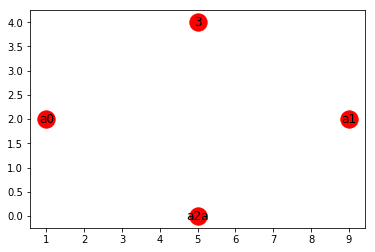

In [4]:
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
def file_parsing(file_path):
    cnt = 0
    output_list = []

    with open(file_path, 'r') as fp:
        for line in fp:
            cnt += 1
            #checks for the room name and coordinates
            if re.match('([^\s#]{1,10}) (\d+) (\d+)', line, re.MULTILINE):
                output_list.append(line.strip().split(' '))
            #checks for start
            if line.startswith('##start'):
                output_list.append(next(fp, '').strip().split())
            #checks for start
            if line.startswith('##end'):
                output_list.append(next(fp, '').strip().split())
    room_name = [item[0] for item in output_list]
    x_coord = [int(item[1]) for item in output_list]
    y_coord = [int(item[2]) for item in output_list]
    x_y = list(zip(x_coord, y_coord))

    #--------------Changes start from here -----------#

    pos_dict = dict(zip(room_name, x_y))
    return pos_dict

room_pos_dict = file_parsing('ex.txt')
print(room_pos_dict)
G = nx.Graph()
G.add_nodes_from(room_pos_dict.keys())
nx.set_node_attributes(G, room_pos_dict, 'pos')
# nx.set_edge_attributes(G, room_pos_dict.values(), 'pos')
nx.draw_networkx(G, pos=nx.get_node_attributes(G, 'pos'))

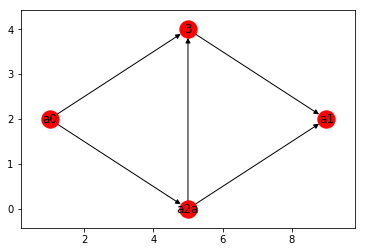

In [1]:
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

def file_parsing(file_path):
    cnt = 0
    output_list = []
    edge_list = []
    with open(file_path, 'r') as fp:
        for line in fp:
            cnt += 1
            #checks for the room name and coordinates
            if re.match('([^\s#]{1,10}) (\d+) (\d+)', line, re.MULTILINE):
                output_list.append(line.strip().split(' '))
            #checks for start
            if line.startswith('##start'):
                output_list.append(next(fp, '').strip().split())
            #checks for start
            if line.startswith('##end'):
                output_list.append(next(fp, '').strip().split())

            # --------- Check for edges -----------#
            if '-' in line:
                src, dest = line.split('-')
                edge_list.append([src.strip(), dest.strip()])
    room_name = [item[0] for item in output_list]
    x_coord = [int(item[1]) for item in output_list]
    y_coord = [int(item[2]) for item in output_list]
    x_y = list(zip(x_coord, y_coord))
    pos_dict = dict(zip(room_name, x_y))

    return pos_dict, edge_list

room_pos_dict, edge_list = file_parsing('ex.txt')

G = nx.DiGraph()
G.add_nodes_from(room_pos_dict.keys())

#----------- Add edges from the edge list ------ 
G.add_edges_from(edge_list)

nx.set_node_attributes(G, room_pos_dict, 'pos')
nx.draw_networkx(G, pos=nx.get_node_attributes(G, 'pos'))